## How does a person's sexual orientation affect their sexual behaviour?

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *

In [124]:
import plotly
plotly.__version__

'2.5.1'

In [125]:
plotly.tools.set_credentials_file(username='lilahrose', api_key='ImkdoSXnVpbOFkAoPb5p')

In [126]:
prepped_sexWork_df = pd.read_csv('../../data/raw/prepped_online_sex_work.csv')
prepped_sexWork_df.head()

Gender   Age  Verification Sexual_orientation Sexual_polarity Looking_for  \
0   male  34.6  Non_Verified         Homosexual          Switch         Men   
1   male  32.2  Non_Verified       Heterosexual        Dominant       Women   
2   male  33.6  Non_Verified       Heterosexual        Dominant       Women   
3   male  34.0  Non_Verified       Heterosexual        Dominant       Women   
4   male  39.5  Non_Verified       Heterosexual        Dominant       Women   

       Last_login Member_since  Number_of_Comments_in_public_forum  \
0  before_10_days   2012-09-17                                  32   
1   before_1_days   2009-01-11                                 710   
2   before_3_days   2013-01-04                                  25   
3   before_4_days   2013-08-04                                 107   
4   before_5_days   2013-04-14                                 600   

   Number_of_offline_meetings_attended  Profile_pictures     Risk  Days  \
0                                  0.0               0.0  No_risk     0   
1                                  0.0               0.0  No_risk     0   
2                                  1.0              45.0  No_risk     0   
3                                  0.0               1.0  No_risk    14   
4                                  6.0               8.0  No_risk     0   

             Total_chat_time  Friends  
0  0 days 00:02:00.000000000      1.0  
1  0 days 03:45:00.000000000      7.0  
2  0 days 02:15:00.000000000      3.0  
3  0 days 23:22:00.000000000     12.0  
4  0 days 00:21:00.000000000     35.0

In [127]:
prepped_sexWork_df['Total_chat_time'] = pd.to_timedelta(prepped_sexWork_df['Total_chat_time'])

In [128]:
prepped_sexWork_df.head()

Gender   Age  Verification Sexual_orientation Sexual_polarity Looking_for  \
0   male  34.6  Non_Verified         Homosexual          Switch         Men   
1   male  32.2  Non_Verified       Heterosexual        Dominant       Women   
2   male  33.6  Non_Verified       Heterosexual        Dominant       Women   
3   male  34.0  Non_Verified       Heterosexual        Dominant       Women   
4   male  39.5  Non_Verified       Heterosexual        Dominant       Women   

       Last_login Member_since  Number_of_Comments_in_public_forum  \
0  before_10_days   2012-09-17                                  32   
1   before_1_days   2009-01-11                                 710   
2   before_3_days   2013-01-04                                  25   
3   before_4_days   2013-08-04                                 107   
4   before_5_days   2013-04-14                                 600   

   Number_of_offline_meetings_attended  Profile_pictures     Risk  Days  \
0                                  0.0               0.0  No_risk     0   
1                                  0.0               0.0  No_risk     0   
2                                  1.0              45.0  No_risk     0   
3                                  0.0               1.0  No_risk    14   
4                                  6.0               8.0  No_risk     0   

  Total_chat_time  Friends  
0        00:02:00      1.0  
1        03:45:00      7.0  
2        02:15:00      3.0  
3        23:22:00     12.0  
4        00:21:00     35.0

In [129]:
#Examining how people
prepped_sexWork_df.groupby('Sexual_orientation')[['Friends', 'Age']].mean()

Friends        Age
Sexual_orientation                     
Heterosexual        3.236486  36.518315
Homosexual          1.903614  34.710050
bicurious           3.776504  33.288699
bisexual            4.354207  36.070228

In [130]:
#right now this shows that e.g. heterosexual people are at a higher risk to pay for sex when they have so and so friends and 
#are of so and so ages.
#but what I want to do is show that people are at higher risk to pay for sex when they are heterosexual, of a certain age and with a
#certain social circle... unless what is currently there can be interepreted in both ways.. currently not too sure.
prepped_sexWork_df.groupby(['Sexual_orientation', 'Risk'])[['Friends', 'Age']].mean().unstack()

Friends                               Age             \
Risk                High_risk   No_risk unknown_risk  High_risk    No_risk   
Sexual_orientation                                                           
Heterosexual        12.333333   8.37931     3.137339  38.039130  37.113043   
Homosexual           4.000000   8.00000     1.725000  41.400000  33.200000   
bicurious            3.000000  16.00000     3.674419  29.116667  32.975000   
bisexual             2.000000   5.00000     4.353755  31.600000  35.860000   

                                 
Risk               unknown_risk  
Sexual_orientation               
Heterosexual          36.515253  
Homosexual            34.706387  
bicurious             33.297518  
bisexual              36.072507

In [131]:
#Lookig further to examine differences between genders
prepped_sexWork_df.groupby(['Sexual_orientation', 'Gender', 'Risk'])[['Friends', 'Age']].mean().unstack()

Friends                             Age  \
Risk                       High_risk No_risk unknown_risk  High_risk   
Sexual_orientation Gender                                              
Heterosexual       female  11.333333    19.5     3.667093  36.025000   
                   male    12.833333     6.6     2.870239  38.463158   
Homosexual         female        NaN     NaN     1.368421        NaN   
                   male     4.000000     8.0     1.836066  41.400000   
bicurious          female   3.000000    21.5     4.582569  31.300000   
                   male     3.000000     5.0     2.103175  28.025000   
bisexual           female        NaN     5.0     5.444118        NaN   
                   male     2.000000     NaN     2.120482  31.600000   

                                                   
Risk                         No_risk unknown_risk  
Sexual_orientation Gender                          
Heterosexual       female  37.066667    33.349628  
                   male    37.120000    37.202959  
Homosexual         female        NaN    29.639161  
                   male    33.200000    35.549942  
bicurious          female  29.600000    30.552023  
                   male    36.350000    34.823225  
bisexual           female  31.250000    32.048552  
                   male    54.300000    38.356263

### Visualisations

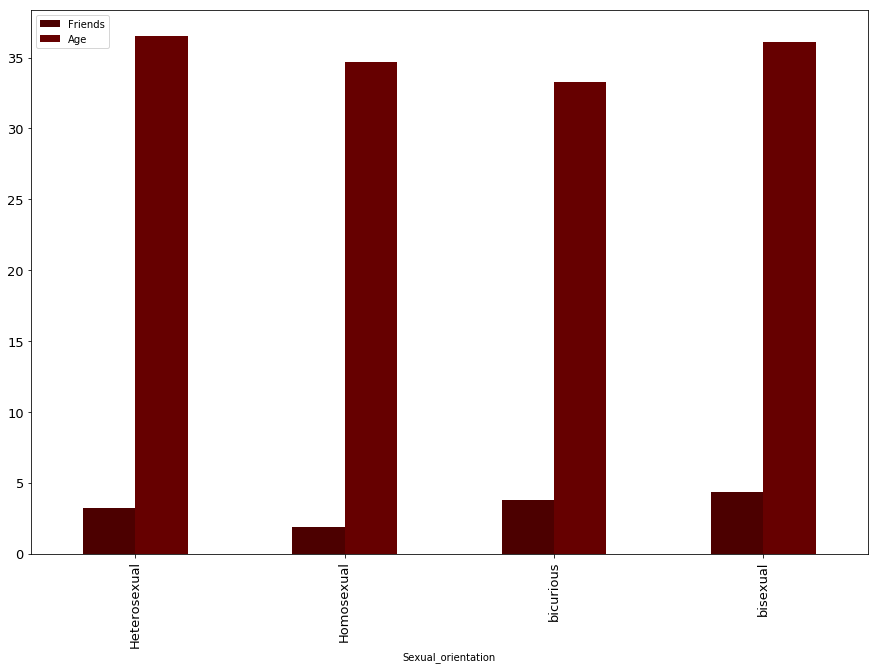

In [132]:
colors = ['#4c0000', '#660000', '#7f0000', '#990000', '#b20000', 
          '#cc0000', '#e50000', '#ff0000', '#ff3232', '#ff6666']

prepped_sexWork_df.groupby(['Sexual_orientation'])[['Friends', 'Age']].mean().plot(kind='bar',color=colors,figsize=(15,10),fontsize=13)

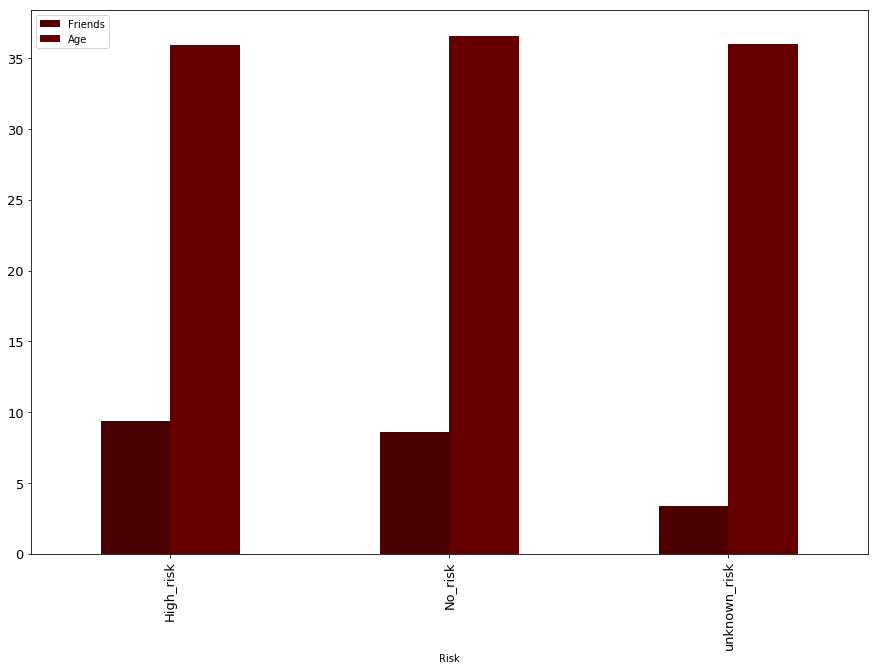

In [133]:
prepped_sexWork_df.groupby(['Risk'])[['Friends', 'Age']].mean().plot(kind='bar',color=colors,figsize=(15,10),fontsize=13)

## Reddit Thread

In [134]:
prepped_redditThread_df = pd.read_csv('../../data/raw/prepped_foreveralone.csv')
prepped_redditThread_df.head()

gender sexuality  age                race     bodyweight virgin  \
0   Male  Straight   35  White non-Hispanic  Normal weight    Yes   
1   Male  Bisexual   21  White non-Hispanic    Underweight    Yes   
2   Male  Straight   22  White non-Hispanic     Overweight    Yes   
3   Male  Straight   19  White non-Hispanic     Overweight    Yes   
4   Male  Straight   23  White non-Hispanic     Overweight     No   

  prostitution_legal     pay_for_sex  friends social_fear  \
0                 No              No        0         Yes   
1                 No              No        0         Yes   
2                 No              No       10         Yes   
3                Yes              No        8         Yes   
4                 No  Yes and I have       10          No   

                                           edu_level  
0                                   Associate degree  
1                            Some college, no degree  
2                            Some college, no degree  
3                            Some college, no degree  
4  High school graduate, diploma or the equivalen...

In [137]:
prepped_redditThread_df.groupby(['sexuality', 'gender', 'pay_for_sex'])[['prostitution_legal','age']].mean()

age
sexuality   gender             pay_for_sex                 
Asexual     Androgyne          No                 26.000000
Bisexual    Female             No                 23.944444
                               Yes but I haven't  25.500000
            Male               No                 23.214286
                               Yes but I haven't  23.100000
            Transgender male   Yes and I have     12.000000
Gay/Lesbian Female             No                 23.500000
            Male               No                 24.250000
Straight    Female             No                 24.477273
                               Yes but I haven't  26.800000
            Male               No                 23.688312
                               Yes and I have     25.714286
                               Yes but I haven't  24.133929
            Transgender female No                 25.000000
            Transgender male   No                 21.000000

In [136]:
# prepped_redditThread_df.groupby(['sexuality', 'gender', 'pay_for_sex'])[['social_fear']].apply(lambda x: x['social_fear'].value_counts())